# Binaryzacja


### Cel:
- zapoznanie z segmentacją obiektów poprzez binaryzację,
- zapoznanie z binaryzacją na podstawie histogramu (globalną),
- zapoznanie z metodami automatycznego wyznaczania progu Ots'u, Kitller'a i Kapur'a,
- zapoznanie z binaryzacją lokalną (na podstawie średniej i metodą Sauvola),
- zapoznanie z binaryzacją dwuprogową,
- zadanie domowe: zapoznanie z adaptacyjną binaryzacją lokalną.

### Binaryzacja - wprowadzenie

Jednym z najważniejszych etapów podczas analizy obrazów jest segmentacja -- podział obrazu na rejony według pewnego kryterium  -- jasności, koloru, tekstury.
Najprostszą (i też najczęściej wykorzystywaną) metodą segmentacji jest **binaryzacja**. 
Do jej głównych zalet zalicza się: intuicyjność, prostotę, łatwość implementacji i szybkość wykonywania. 
Jest ona etapem wielu algorytmów analizy obrazów. 
Pozwala na znaczną redukcję informacji w obrazie (np. dla wejściowego obrazu w skali szarości z zakresu 0-255 do 0-1).
 
Binaryzacja najczęściej realizowana jest poprzez progowanie. 
Na przykład: dla obrazu w odcieniach szarości ustala się próg na poziomie $k$. 
Wszystkie piksele o wartości (jasności) większej od $k$ zostają uznane za obiekty, a pozostałe za tło. 
Oczywiście podejście takie daje się zastosować wtedy, gdy obiekty mają istotnie różną jasność od otaczającego je tła.


### Binaryzacja na podstawie histogramu

W rozdziale zostanie zademonstrowane wyznaczanie progu na podstawie "ręcznej" analizy histogramu oraz wpływ szumu i niejednorodnego oświetlenia sceny na proces binaryzacji.

1. Potrzebne w ćwiczeniu moduły są już wpisane - zwróć uwagę pod jakimi nazwami będą one widziane (plt, cv2, np).

2. Wczytaj obraz _coins.png_ w trybie odcieni szarości. Wyświetl go. 
Wyznacz jego histogram (funkcja `np.histogram` lub 'cv2.calcHist') i wyświetl go.
Przy wyświetlaniu histogramu warto zwiększyć liczbę wyświetlanych wartości na osi x oraz powiększyć sam wykres (funkcje *plt.xticks(np.arange(0, 256, 20.0))* oraz *plt.rcParams["figure.figsize"] = (10,5)*.
Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.
      


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("coins.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/coins.png --no-check-certificate
if not os.path.exists("rice.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/rice.png --no-check-certificate
if not os.path.exists("catalogue.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/catalogue.png --no-check-certificate
if not os.path.exists("bart.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/bart.png --no-check-certificate
if not os.path.exists("figura1.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura1.png --no-check-certificate
if not os.path.exists("figura2.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura2.png --no-check-certificate
if not os.path.exists("figura3.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura3.png --no-check-certificate
if not os.path.exists("figura4.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/04_Thresholding/figura4.png --no-check-certificate

In [2]:
coins = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

In [3]:

def show_im_and_hist(image):
  hist = cv2.calcHist([image], [0], None, [256], [0, 256])

  f, axes = plt.subplots(1,2)
  f.set_size_inches(20, 10)

  axes[0].imshow(image,'gray')
  axes[0].set_title('original image')
  axes[0].axis('off')
  axes[1].set_xticks(np.arange(0, 256, 20.0))
  # axes[1].rcParams["figure.figsize"] = (10,5)
  axes[1].plot(hist)
  axes[1].grid()
  axes[1].set_title('histogram')

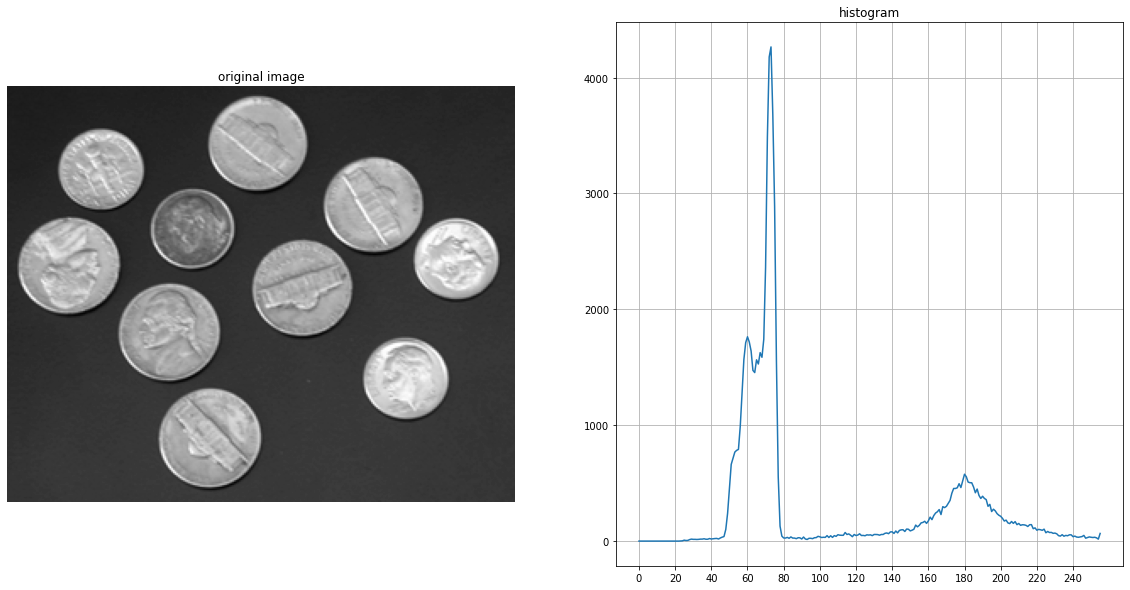

In [4]:
show_im_and_hist(coins)

3. Wizualna analiza histogramu pozwala zauważyć dwa maksima - jedno odpowiadające poziomowi jasności tła (które w tym przypadku jest względnie jednolite - ciemnoszare) i drugie odpowiadające monetom.

Na podstawie histogramu wyznacz próg i wykonaj binaryzację:
- wykorzystaj fakt, że dla macierzy *numpy* można wykonać operację porównania wszystkich jej wartości z liczbą  - wynikiem jest macierz zawierająca wartości *True* i *False*, którą można przekonwertować metodą macierz.astype(np.int) na macierz z wartościami 1 i 0 (aczkolwiek nie jest to tu konieczne).
- wynik binaryzacji wyświetl,
- spróbuj dobrać jak najlepszy próg binaryzacji. Jako "kryterium jakości" przyjmij kształty monet - dla poprawnie dobranego progu powinny to być wypełnione koła.

Uwaga. Proszę powyższą funkcjonalność zaimplementować jako funkcję, gdyż przyda się w dalszej części ćwiczenia.

In [5]:
def show_im_thresholded(image, thresh):
    im_thresholded = image > thresh
    plt.axis('off')
    plt.imshow(im_thresholded,'gray')

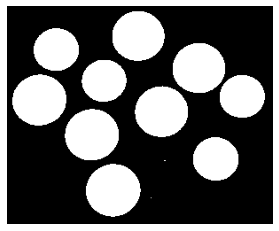

In [6]:
thresh = 80
show_im_thresholded(coins, thresh)

4. Na "stopień trudności" przeprowadzenia binaryzacji największy wpływ mają dwa czynniki:
- szum,
- niejednorodne oświetlenie.
	  
Użyj obrazy:
 - _figura1.png_ (bez zaszumienia),
 - _figura2.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 10),
 - _figura3.png_ (dodany szum Gaussowski o średniej 0 i odchyleniu standardowym 50),
 - _figura4.png_ (dodany gradient oświetlenia -- symulacja oświetlenia niejednorodnego) i wyświetl ich histogramy (wykorzystaj funkcję z poprzedniego punktu).


In [7]:
f1 = cv2.imread('figura1.png', cv2.IMREAD_GRAYSCALE)
f2 = cv2.imread('figura2.png', cv2.IMREAD_GRAYSCALE)
f3 = cv2.imread('figura3.png', cv2.IMREAD_GRAYSCALE)
f4 = cv2.imread('figura4.png', cv2.IMREAD_GRAYSCALE)

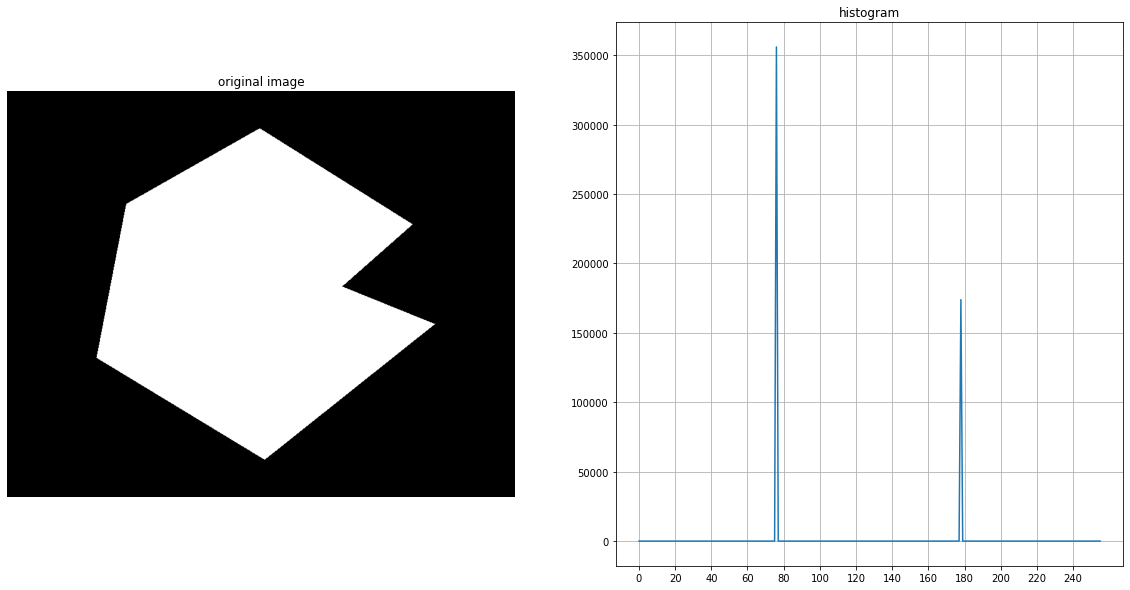

In [8]:
show_im_and_hist(f1)

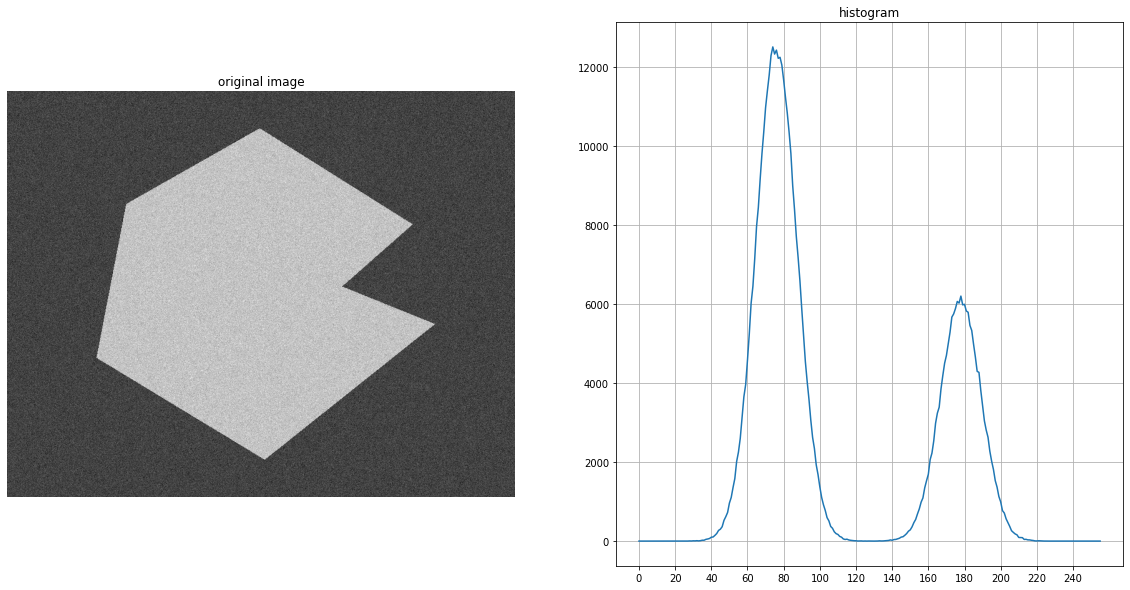

In [9]:
show_im_and_hist(f2)

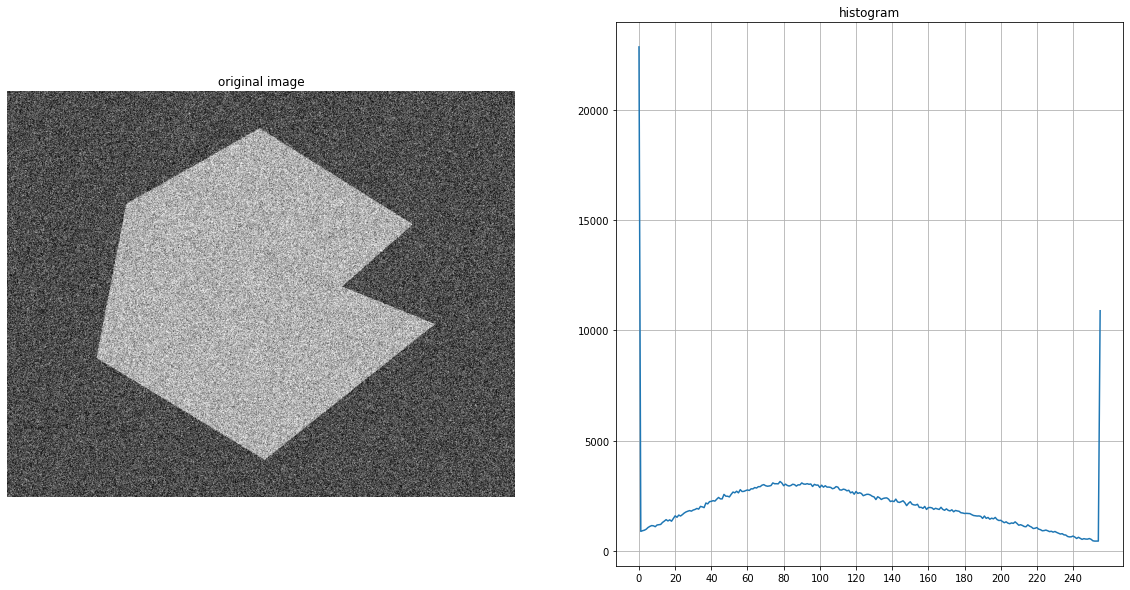

In [10]:
show_im_and_hist(f3)

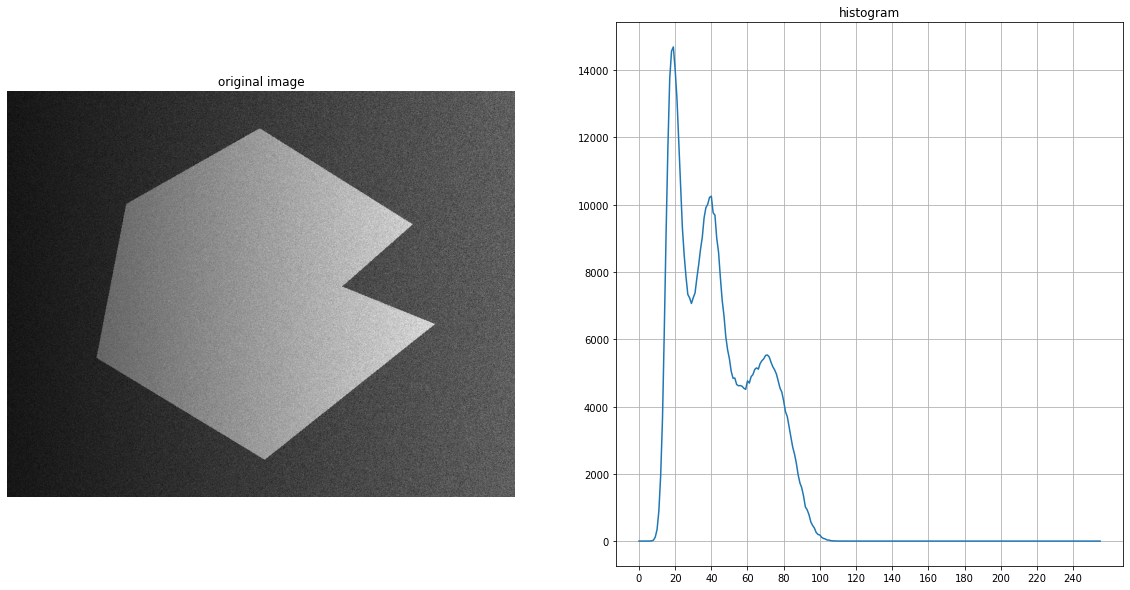

In [11]:
show_im_and_hist(f4)

Spróbuj wyznaczyć progi binaryzacji na podstawie wyświetlonych histogramów.
Jak dodanie szumu wypłynęło na histogram i łatwość wyznaczania progu binaryzacji?
Czy jest to możliwe we wszystkich przypadkach?

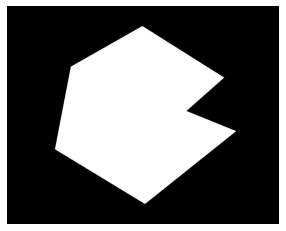

In [12]:
show_im_thresholded(f1,130)

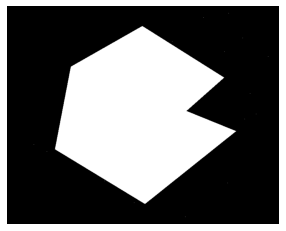

In [13]:
show_im_thresholded(f2,120)

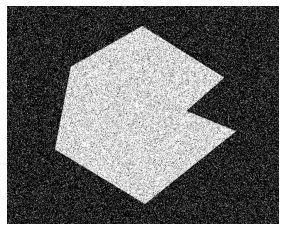

In [14]:
show_im_thresholded(f3,130)

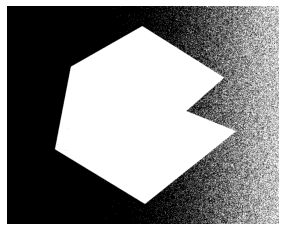

In [15]:
show_im_thresholded(f4,40)

### Automatyczne wyznaczanie progu binaryzacji

W automatycznym systemie analizy obrazów (działanie bez nadzoru operatora) konieczne jest zastosowanie metody binaryzacji, która w sposób automatyczny wyznacza próg binaryzacji.
Oczywiście można sobie wyobrazić użycie stałego progu (np. 10), ale wtedy należy zadbać o niezmienność warunków oświetleniowych, co w niektórych zastosowaniach może być problematyczne.

#### Iteracyjne wyznaczenie progu

Jednym z najprostszych podejść jest iteracyjna procedura wyliczania progu.
Jako pierwsze przybliżenie progu ($k$) przyjmuje się średnia jasność na obrazie.
Następnie, na podstawie $k$,  dzieli się obraz na dwa podobrazy $I_0$ i  $I_1$ (dwie klasy $C_0$ i $C_1$).
Dla każdego z nich oblicza się średnią jasność: $m_0$ i $m_1$.
Jako nowy próg przyjmuje się:
\begin{equation}
\label{eq:thresholding:mean_auto} \tag{1}
k_{new} = \frac{m_0 + m_1}{2}
\end{equation}
Procedurę kontynuuje się do momentu, aż różnica pomiędzy dwoma kolejnymi progami będzie mniejsza niż zadana wartość.


**Zadanie: zaimplementować opisany powyżej algorytm.**


Jak można zauważyć, do poprawnego działania metody potrzebne będzie obliczanie średniej jasności, również dla pewnych podobrazów.
Wykorzystamy do tego znormalizowanych histogram:
\begin{equation}
\label{eq:p_i} \tag{2}
p_i = n_i/N,   \sum_{i=0}^L p_i = 1
\end{equation}
gdzie: $n_i$ liczba pikseli o jasności $i$ ($i = 0,1, ... L-1$) - histogram, $L$ - liczba poziomów jasności, $N$ - liczba pikseli na obrazie ($N = n_0 + n_1 + ... + n_{L-1}$).

Jeśli podzielimy obraz na dwie klasy $C_0$ i $C_1$ (tło i obiekty albo obiekty i tło) z progiem podziału oznaczonym jako $k$, to do klasy $C_0$ należeć będą piksele o poziomach $[0,k]$, a do klasy $C1$ piksele o poziomach $[k+1,L-1]$.

Wtedy prawdopodobieństwo, że piksel należy do klasy $C_0$ wynosi:
\begin{equation}
\label{eq:P_0} \tag{3}
P_0(k) = \sum_{i=0}^{k} p_i
\end{equation}

Podobnie prawdopodobieństwo, że należy do klasy $C_1$ wynosi:

\begin{equation}
\label{eq:P_1} \tag{4}
P_1(k) = \sum_{i=k+1}^{L-1} p_i = 1 - P_0(k)
\end{equation}

Średnią jasność pikseli należących do klasy $C_0$ można wyznaczyć na podstawie:

\begin{equation}
\label{eq:m_0} \tag{5}
m_0(k) = \sum_{i=0}^{k} iP(i|C_0)
\end{equation}

gdzie: $|$ oznacza prawdopodobieństwo warunkowe, a wyraz $P(i|C_0)$ - prawdopodobieństwo dla wartości $i$ pod warunkiem, że $i$ należy do klasy $C_0$.
Równanie to jest szczególnym przypadkiem wykorzystania momentów statystycznych do wyliczania pewnych parametrów statystycznych - w tym przypadku średniej.

Wykorzystując regułę Bayesa:

\begin{equation}
\label{eq:P_A_B} \tag{6}
P(A|B) = P(B|A)P(A)/P(B)
\end{equation}
możemy zapisać:

\begin{equation}
\label{eq:m_0k} \tag{7}
m_0(k) = \sum_{i=0}^{k} i P(C_0|i)P(i)/P(C_0)
\end{equation}
Wyraz $P(C_0|i) = 1$, gdyż z założenia rozpatrujemy tylko piksele należące do klasy $C_0$.
Wyraz $P(i)$ stanowi $i$-ty element znormalizowanego histogramu tj. $P(i) = p_i$, a $P(C_0)$ to prawdopodobieństwo przynależności do klasy $C_0$ określone wcześniej $P(C_0) = P_0(k)$.
Ostatecznie możemy więc zapisać:

\begin{equation}
\label{eq:thresholding:meanHistC0} \tag{8}
m_0(k) = \frac{1}{P_0(k)} \sum_{i=0}^{k} i p_i
\end{equation}

Na podstawie analogicznych rozważań można wyprowadzić wzór na średnią jasności pikseli należących do klasy $C_1$:
\begin{equation}
\label{eq:thresholding:meanHistC1}  \tag{9}
m_1(k) = \frac{1}{P_1(k)} \sum_{i=k+1}^{L-1} i p_i
\end{equation}

Średnia jasność całego obrazu dana jest zależnością:
\begin{equation}
\label{eq:thresholding:meanHistGlobal} \tag{10}
m_G = \sum_{i=0}^{L-1} ip_i
\end{equation}


1. Wczytaj obraz _coins.png_. Wyświetl go.

2. Wylicz histogram i histogram skumulowany (funkcja `np.cumsum`).
   Na podstawie zależności (\ref{eq:thresholding:meanHistGlobal}) wylicz średnią - pierwszy próg podziału $k$.
   Uwagi:
   - przed dalszymi obliczeniami dobrze jest usunąć zbędny wymiar tablicy z histogramem - polecenie `np.squeeze`
    - $p_i$ to nasz znormalizowany histogram, a wartości od $0$ do $255$ można wygenerować poleceniem `np.arange(256)`,
    - zmiast pętli `for` można wykorzystać iloczyn sklarny dwóch wektorów tj. `np.dot`.

3.  W nieskończonej petli `while` wykonaj następujące kroki:
- oblicz średnią $m_0$ -- zależność (\ref{eq:thresholding:meanHistC0}):
    - dla $P_0$ wystarczy wykorzystać odpowiednią wartość znormalizowanego histogramu skumulowanego, dla pozostałej części wyrażenia podobne rozwiązanie jak dla pierwszej średniej,
- oblicz średnią $m_1$ -- zależność (\ref{eq:thresholding:meanHistC1}),
- oblicz nowy próg $k_{new}$ -- zależność (\ref{eq:thresholding:mean_auto}),
- oblicz moduł z różnicy pomiędzy $k_{new}$, a $k$ i sprawdź czy jest mniejszy od progu (np. $1$),
- jeśli tak to zakończ obliczenia (`break`), jeśli nie to przypisz $k = k_{new}$ i kontynuuj obliczenia,
- wyświetl próg oraz wynik binaryzacji.

4. Sprawdz jak metoda dziala na obrazach _figura1.png_ do _figura4.png_. 

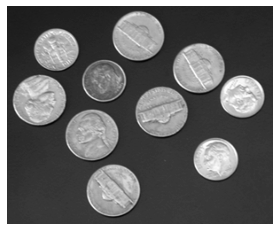

In [16]:
plt.axis('off')
plt.imshow(coins,'gray')

In [17]:
img_coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)

def iter_threshholding(obraz):
    hist_or = cv2.calcHist([obraz], [0], None, [256], [0, 256])
    hist_or = np.squeeze(hist_or)

    p = hist_or / np.sum(hist_or) 
    P = p.cumsum()

    k = p @ np.arange(256)
    while True:
        m0 = 1 / P[int(k)] * (np.arange(int(k)) @ p[:int(k)])
        m1 = 1 / (1 - P[int(k)]) * (np.arange(int(k), 256) @ p[int(k):])
        k_new = (m0 + m1) / 2
        if np.abs(k_new - k) < 0.5:
            break
        k = k_new
    return k

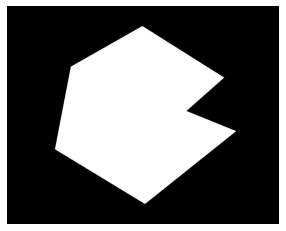

In [18]:
iter_thresh = iter_threshholding(f1)
show_im_thresholded(f1,iter_thresh)

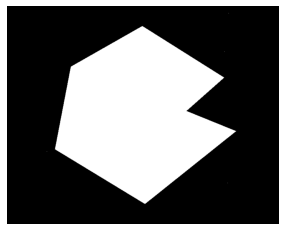

In [19]:
iter_thresh = iter_threshholding(f2)
show_im_thresholded(f2,iter_thresh)

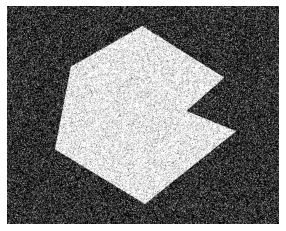

In [20]:
iter_thresh = iter_threshholding(f3)
show_im_thresholded(f3,iter_thresh)

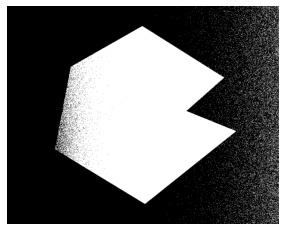

In [21]:
iter_thresh = iter_threshholding(f4)
show_im_thresholded(f4,iter_thresh)

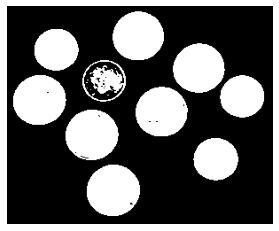

In [22]:
iter_thresh = iter_threshholding(coins)
show_im_thresholded(coins,iter_thresh)

#### Metoda Otsu

Jednym z częściej wykorzystywanych algorytmów wyznaczania progu jest metoda zaproponowana w roku 1979 przez Nobuyuki Otsu w artykule pt. "A Threshold Selection Method from Gray-Level Histograms" (można odszukać na IEEE Xplore).
W algorytmie zakłada się, że obraz zawiera piksele należące do dwóch klas (obiektów i tła) tj. histogram obrazu jest bi-modalny (ma dwa maksima).
Próg podziału obliczany jest tak, aby wariancja międzyklasowa była maksymalna.
W tym sensie metodę Otsu można nazwać optymalną.

Wprowadźmy teraz wskaźnik "jakości" wybranego progu podziału $k$, który będziemy optymalizować.
W algorytmie Otsu jest to:

\begin{equation}
\label{eq:thresholding:otsu:eta} \tag{11}
\eta(k) = \frac{\sigma^2_B(k)}{\sigma^2_G}
\end{equation}
gdzie:  $\sigma^2_G$ - wariancja globalna, która może zostać obliczona na podstawie momentów statystycznych jako:

\begin{equation}
\label{eq:sigma} \tag{12}
\sigma^2_G =  \sum_{i=0}^{L-1} (i - m_G)^2 p_i
\end{equation}
a $\sigma^2_B$ jest wariancją międzyklasową, która jest zdefiniowana jako:
\begin{equation}
\label{eq:sigma_b} \tag{13}
\sigma^2_B(k) =  P_0(k)(m_0(k) - m_G)^2 + P_1(k)(m_1(k) - m_G)^2
\end{equation}
Równianie to można również przekształcić do:
\begin{equation}
\label{eq:thresholding:otsu:sigma_B_2} \tag{14}
\sigma^2_B(k) =  P_0(k)P_1(k)(m_0(k) - m_1(k))^2 = \frac{(m_G P_0(k) - m(k) )^2}{P_0(k)(1-P_0(k))}
\end{equation}
gdzie:
\begin{equation}
\label{eq:mk} \tag{15}
m(k) = \sum_{i=0}^{k} i p_i
\end{equation}

Taki zapis pozwala przyspieszyć obliczenia.
Wartość $m_G$ wyznaczana jest jednokrotnie, a zachodzi tylko potrzeba obliczania $m(k)$ i $P_0(k)$ w każdej iteracji.
Warto też zwrócić uwagę, że równanie ma sens dla $P_0 > 0$.

Warto zauważyć, że z postaci równania (\ref{eq:thresholding:otsu:sigma_B_2}) wynika, że im większa odległość pomiędzy średnimi $m_0$ i $m_1$ tym wartość wariancji międzyklasowej jest większa.
Pokazuje to, że przyjęty współczynniki może być podstawą do separacji dwóch klas - im jego wartość jest większa, tym lepsze rozdzielenie.
Dodatkowo, z równania (\ref{eq:thresholding:otsu:eta}) wynika, że $\eta(k)$ zależy tylko od wariancji międzyklasowej $\sigma^2_B(k)$, gdyż wariancja globalna $\sigma^2_G$ jest stała.
Zatem w procesie optymalizacji należy dążyć do maksymalizacji wskaźnika $\eta$.

Należy też pamiętać, że współczynnik jest poprawnie określony tylko dla wartości $\sigma^2_G > 0$.
Przy czym, wartość $0$ może on przyjąć tylko dla obrazu o jednym poziomie szarości - w takim przypadku trudno mówić o podziale pikseli na dwie klasy (skoro występuje tylko jedna).

Ostatecznie optymalny próg binaryzacji $\bar{k}$ wyliczamy na podstawie zależności:
\begin{equation}
\label{eq:sigma_B_k} \tag{16}
\sigma^2_B(\bar{k}) \max\limits_{l \in[0,L-1]} {\sigma^2_B(k) }
\end{equation}

Uwagi:
- może się zdarzyć, że znajdziemy więcej niż jedno maksimum tj. więcej wartości $\bar{k}$.
  W takim przypadku zwykle zakłada się, że próg będzie średnią otrzymanych wartości.
- liczby $P_0(\bar{k})$ i $P_1(\bar{k})$ odpowiadają powierzchni zajmowanej przez obiekty klas $C_0$ i $C_1$.
- liczby $m_0(\bar{k})$ i $m_1(\bar{k})$ odpowiadają średniej jasności obiektów klas $C_0$ i $C_1$.
- wartość parametru $\eta(\bar{k})$ określa "jakość" wyznaczonego progu -- im większa tym lepiej.

Zadanie: wykorzystując podane powyżej informacje należy zaimplementować metodę wyznaczania progu binaryzacji zaproponowaną przez Otsu.

1. Wczytaj obraz _coins.png_.
      Wyświetl go.

2. Wyznacz jego histogram znormalizowany oraz oblicz średnią jasność (można do tego wykorzystać histogram) - kod zbliżony do stworzonego wcześniej.

3. Zdefiniuj 256-elementowy wektor na współczynniki $\sigma_B^2$ (funkcja `np.zeros`).

4. W pętli po możliwych wartościach progu binaryzacji wyznacz wartość $\sigma_B^2(k)$ na podstawie zależności (\ref{eq:thresholding:otsu:sigma_B_2}).
      Uwagi:
      - wcześniejszego liczenia wartości $P_0(k)$ i $m(k)$ można uniknąć inkrementując wartośc $P_0, m$  w każdej iteracji.
      - należy pamiętać, że równanie ma sens tylko dla $0 < P_0(k) < 1$. <br>

5. Wyświetl przebieg $\sigma_B^2(k)$.
      Wykorzystaj funkcję `plt.plot`.

6. Wyznacz wartość $\bar{k}$ dla której współczynnik $\sigma_B^2$ jest maksymalny.
	  Można to zrobić poprzez dodanie instrukcji w pętli (rozwiązanie bardziej elegancie) lub wykorzystując funkcję `max` (rozwiązanie dla leniwych).
	  Uwaga. Proszę pominąć obsługę przypadków niejednoznacznego maksimum.

7. Zbinaryzuj obraz wykorzystując otrzymany próg.
      Porównaj wyniki z rezultatem binaryzacji "ręcznej".

8. W OpenCV dostępna jest implementacja metody Otsu - funkcja `cv2.threshold` z parametrem `cv2.THRESH_OTSU`.
      Funkcja zwraca zbinaryzowany obraz oraz próg.
      Wykonaj binaryzację obrazu _coins.png_ metodą Otsu.
      Porównaj wyniki z własną implementacją - powinno wyjść tak samo (tzn. taki sam próg).

9. Przeprowadź eksperyment również na obrazie _rice.png_ i _catalogue.png_

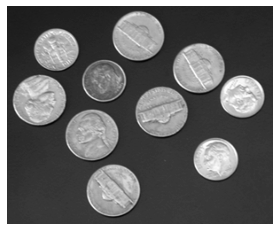

In [23]:
plt.axis('off')
plt.imshow(coins,'gray')

In [24]:
def otsu(image):
    hist_or = cv2.calcHist([image], [0], None, [256], [0, 256])

    p = hist_or / np.sum(hist_or) 

    max_value = -1
    argmax = -1
    m_g = np.arange(256) @ p
    for i in range(1,255):
        m_k = np.arange(i) @ p[:i]
        P0 = np.sum(p[:i])
        P1 = np.sum(p[i:])
        sigma = np.square(m_g * P0 - m_k) / (P0 * P1)
        if sigma > max_value:
            argmax = i
            max_value = sigma
    return argmax, image > argmax

In [25]:
thresh_custom, coins_thresholded = otsu(coins)

/var/folders/w0/07yj0_lj1wd8jmwd6w3yknf80000gn/T/ipykernel_5641/1814721099.py:13: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.square(m_g * P0 - m_k) / (P0 * P1)


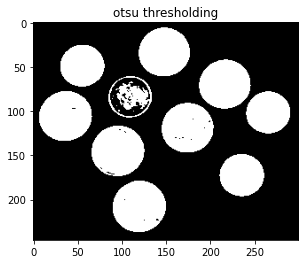

In [26]:
plt.title("otsu thresholding")
plt.imshow(coins_thresholded, cmap='gray')

In [27]:
thresh_custom

127

In [28]:
thresh_opencv, coins_thresholded_opencv = cv2.threshold(coins,127,255,cv2.THRESH_OTSU)

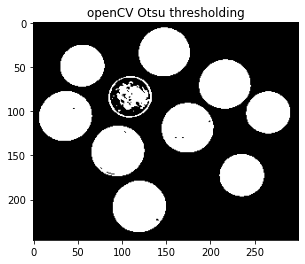

In [29]:
plt.title("openCV Otsu thresholding")
plt.imshow(coins_thresholded_opencv, cmap='gray')

In [30]:
rice = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
catalogue = cv2.imread('catalogue.png', cv2.IMREAD_GRAYSCALE)

/var/folders/w0/07yj0_lj1wd8jmwd6w3yknf80000gn/T/ipykernel_5641/1814721099.py:13: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.square(m_g * P0 - m_k) / (P0 * P1)


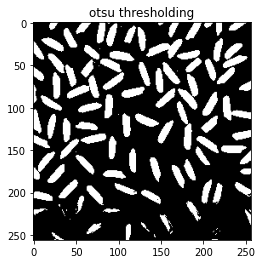

In [31]:
thresh_custom, rice_thresholded = otsu(rice)
plt.title("otsu thresholding")
plt.imshow(rice_thresholded, cmap='gray')

/var/folders/w0/07yj0_lj1wd8jmwd6w3yknf80000gn/T/ipykernel_5641/1814721099.py:13: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.square(m_g * P0 - m_k) / (P0 * P1)


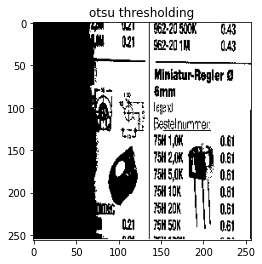

In [32]:
thresh_custom, cat_thresholded = otsu(catalogue)
plt.title("otsu thresholding")
plt.imshow(cat_thresholded, cmap='gray')

### Binaryzacja lokalna


Analiza wyników binaryzacji dla obrazów _rice.png_ i _catalogue.png_ pokazuje, że globalna binaryzacja nie najlepiej działa dla obrazów o niejednorodnym oświetleniu.
Dla obu obrazów trudno również wyznaczyć odpowiedni próg "ręcznie".

Metodą, która pozwala poprawić wyniki binaryzacji, jest binaryzacja lokalna (niekiedy zwana adaptacyjną).
W jednym z wariantów polega ona na wyznaczeniu progu osobno dla każdego piksela na podstawie jego otoczenia (tj. własności jego kontekstu, okna).

1. Dla uproszczenia zakładamy, że obraz ma rozmiar $256 \times 256$ pikseli. Przyjmijmy okno analizy o rozmiarze 15 pikseli.

2. Najprostsza wersja binaryzacji lokalnej zakłada, że próg binaryzacji dla danego okna to średnia z pikseli w tym oknie.

3. Wczytaj obraz _rice.png_. Rozmiar obrazka (`X,Y`) można uzyskać stosując taką składnię: `(X, Y) = obraz.shape`.

4. Podstawą algorytmu są dwie pętle `for` iterujące po pikselach obrazka:


	for j in range(W/2, Y-W/2):
	    for i in range(W/2, X-W/2):

5. Wewnątrz pętli należy dla każdego piksela wyciąć jego otoczenie o rozmiarze `W` (operator `:`), wyznaczyć z niego średnią (metoda `mean`) i na jej podstawie dokonać binaryzacji.

6. Wyświetl obrazy oryginalny i zbinaryzowany.

7. Zaobserwuj rezultaty działania metody dla obrazów _rice.png_ i _catalogue.png_.
      Poeksperymentuj z rozmiarem okna (proszę nie przesadzać z rozmiarem, gdyż istotnie wpływa on na czas obliczeń).
      Jaka jest podstawowa wada zaimplementowanej metody? (pomijając złożoność obliczeniową).
      Proszę się zastanowić jakie jest źródło błędów.

In [33]:
def local_thresholding(image):
    X, Y = image.shape
    W = 15

    result = np.zeros_like(image)

    W = W // 2

    for i in range(W, Y-W):
        for j in range(W, X-W):
            img_W = image[i - W : i + W, j- W : j + W]
            k = img_W.mean()
            result[i,j] = image[i,j] > k
    return result

In [34]:
res_cat = local_thresholding(catalogue)
res_rice = local_thresholding(rice)

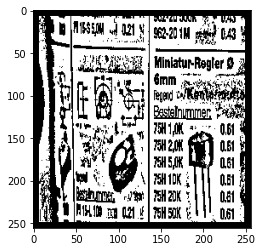

In [35]:
plt.imshow(res_cat, cmap='gray')
plt.show()

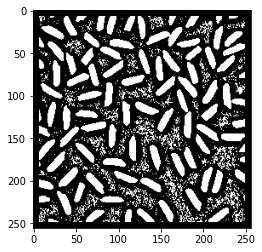

In [36]:
plt.imshow(res_rice, cmap='gray')
plt.show()

8. Jakość działania binaryzacji lokalnej można poprawić wyznaczając próg za pomocą metody Sauvol'i i Pietikainen'a zaproponowanej w artykule *Adaptive document image binarization*.
Wykorzystuje ona, oprócz średniej, informację o odchyleniu standardowym w danym oknie.
Próg binaryzacji wyznaczany jest na podstawie zależności:
\begin{equation}
\label{eq:T} \tag{17} 
T = srednia \{1 \pm k \frac{odchStd}{R}-1 \}
\end{equation}
gdzie: $k$ i $R$ to parametry ($R$ zwykle $128$, a $k$ na początek przyjmij $0.15$), $srednia$ i $odchStd$ to odpowiednio średnia i odchylenie standardowe wyliczone w oknie.

9. Zaimplementuj algorytm Sauvoli - wykorzystaj do wyznaczenia średniej i odchylenia metody `mean()` oraz `std()` liczone dla wycinka (podobnie jak średnia w poprzedniej metodzie).
      
10. Uruchom metodę (uwaga - czas obliczeń nie jest krótki). Przeanalizuj wyniki. Zwróć uwagę, że dodanie informacji o odchyleniu standardowym powinno *poprawić* wyniki binaryzacji.
      Jeżeli dzieje się inaczej, to najprawdopodobniej implementacja zawiera błąd. 
     
11. Zastanów się nad znaczeniem symbolu $\pm$ we wzorze na próg. 
      Kiedy należy zastosować znak $+$, a kiedy $-$.

12. Porównaj jakość binaryzacji lokalnej metodą Sauvol'i i z progiem na podstawie średniej. 
      Poeksperymentuj z rozmiarem okna i parametrem k (dla obrazów _rice.png_ i _catalogue.png_).

In [39]:
def sauvili(img, sign):
    result = np.zeros_like(img)
    X, Y = img.shape
    W=15
    k=0.15
    R=128
    W=W//2
    for j in range(W, X-W):
        for i in range(W, Y-W):
            tmp = img[i-W:i+W, j-W:j+W]
            if sign == 'plus':
                thresh = (1 + k * (tmp.std() / R - 1)) * tmp.mean()
            else:
                thresh = (1 - k * (tmp.std() / R - 1)) * tmp.mean()
            result[i-W:i+W, j-W:j+W] = tmp > thresh
    return result

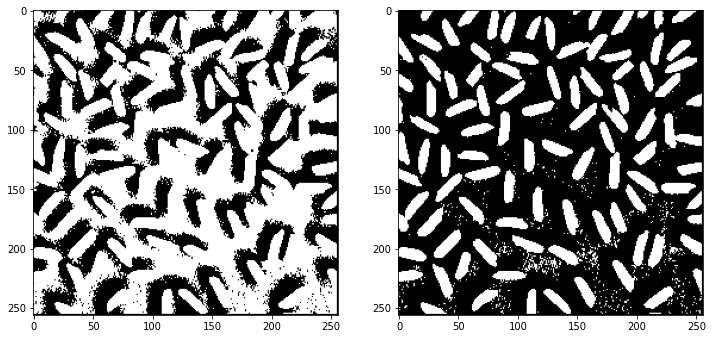

In [40]:
rice_plus = sauvili(rice, sign='plus')
rice_minus = sauvili(rice, sign='minus')

_, (p1,p2) = plt.subplots(1, 2, figsize=(12,6))
p1.imshow(rice_plus, cmap='gray')
p2.imshow(rice_minus, cmap='gray')
plt.show()

In [ ]:
# znak 'minus' redukuje odchylenie standardowe

### Binaryzacja dwuprogowa

Binaryzację można przeprowadzić wykorzystując więciej niż jedn próg.
Przykładem jest binaryzacja dwuprogowa - wybieramy w ten sposób przedział jasności (piksele w nim zawarte klasyfikujemy jako obiekty).

1. Wczytaj obraz _bart.png_. 
Wyświetl go, wyznacz i wyświetl jego histogram.
Oceń, który fragment histogramu odpowiada kolorowi skóry Barta Simpsona.
W tym celu wyświetl obraz wykorzystując funkcję cv2.imshow("Tytuł okna", obraz) i wykorzystaj fakt, że przemieszczanie kursora po obrazie wyświetla wartości pikseli.<br>
**UWAGA 1 - W systemie Windows wartości nie wyświetlają się. Aby odczytać wartości pikseli można zapisać obrazek na dysku (`cv2.imwrite('Nazwa.png', Image)`), a następnie odczytać wartościa programem do edycji obrazów, np. *paint*.**<br>
**UWAGA 2 - NIE zamykaj okna z obrazem przez kliknięcie - okno zamknie się po wciśnięciu dowolnego klawisza klawiatury**.


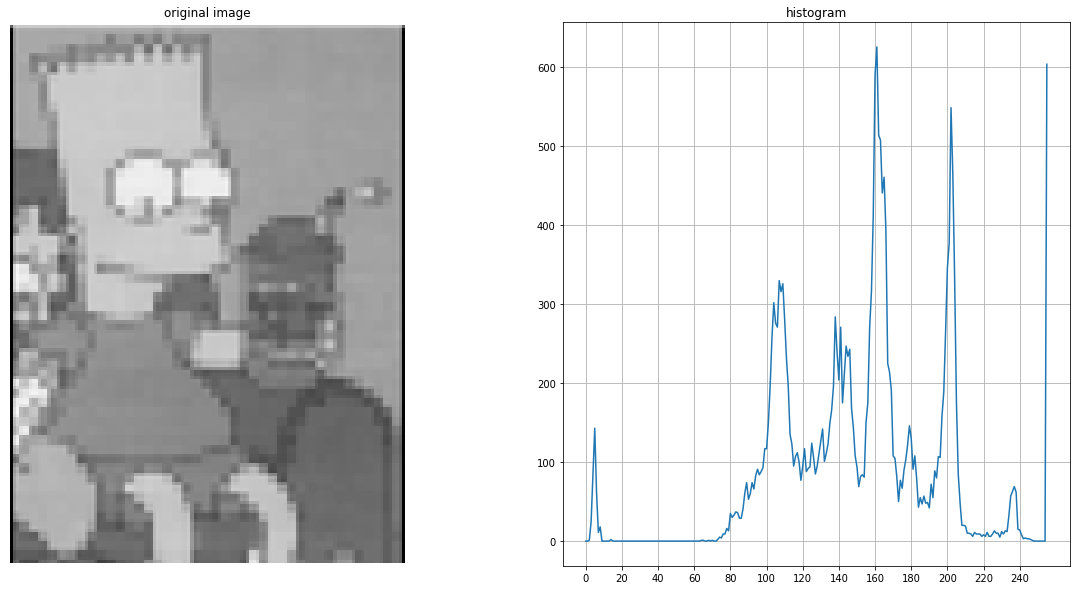

In [41]:
bart = cv2.imread("bart.png", cv2.IMREAD_GRAYSCALE)
show_im_and_hist(bart)

2. Przeprowadź segmentację na podstawie koloru skóry (binaryzację dwuprogową). 
      Wykorzystaj przekształcenie obrazów z wartościami True, False na wartości 1,0 i mnożenie obrazów.
 
3. Wynik wyświetl.

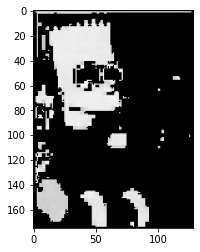

In [42]:
low=170
high=220
bart_low = (bart > low).astype('int8')
bart_high = (bart < high).astype('int8')

plt.imshow(bart * (bart_low * bart_high), cmap='gray')
plt.show()